<a href="https://colab.research.google.com/github/svmamidi/my-project/blob/main/VO2Max_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
from google.colab import files
from sklearn.linear_model import LinearRegression

In [ ]:
#Loading data
from google.colab import files
uploaded = files.upload()

Saving 882EB400.xlsx to 882EB400.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded.get('882EB400.xlsx')))

In [ ]:
xlsx_file = io.BytesIO(uploaded.get('882EB400.xlsx'))

In [ ]:
df_info = pd.read_excel(xlsx_file, 'Analysis_Info')
df_test = pd.read_excel(xlsx_file, 'Analysis_test')

In [ ]:
df_info

,ID,age,Weight,Height,P_vt1,P_vt2,sport,HRmax,VO2max_abs,powermax,VO2_Max
0,1,15,53.7,161,50,140,fencing,192.307692,1.741614,170,32.432288
1,2,15,56.2,162,80,127,fencing,183.579848,1.905661,140,33.908567
2,3,16,89.9,191,155,300,fencing,179.508212,3.402803,305,37.850975
3,4,16,76.5,180,215,275,fencing,192.307692,3.424734,305,44.767764
4,5,17,76.4,186,110,172,fencing,187.533181,3.352790,275,43.884688
5,6,17,65.6,169,131,186,fencing,182.949874,3.373193,245,51.420627
6,7,15,49.8,165,65,108,fencing,186.846996,1.600935,170,32.147290
7,8,15,51.2,165,80,133,fencing,183.910536,1.950244,170,38.090700
8,9,14,57.1,176,50,125,fencing,189.534358,1.724786,200,30.206405
9,10,14,58.8,177,101,162,fencing,190.916678,2.330225,200,39.629683


In [ ]:
df_test

,ID,time,RR,VO2,power,HR,HR_mean,VO2_mean
0,1,-130.840,672.0,0.302008,0,89.285714,89.285714,0.302008
1,1,-130.168,672.0,0.302008,0,89.285714,89.285714,0.302008
2,1,-129.536,632.0,0.301336,0,94.936709,91.169379,0.301784
3,1,-109.280,672.0,0.310178,0,89.285714,90.698463,0.303882
4,1,-104.280,660.0,0.329340,0,90.909091,90.740589,0.308974
...,...,...,...,...,...,...,...,...
47896,18,947.288,536.0,0.507071,0,111.940299,113.483928,0.481351
47897,18,947.816,528.0,0.507071,0,113.636364,112.955387,0.487781
47898,18,948.344,528.0,0.507071,0,113.636364,113.126269,0.494211
47899,18,948.884,540.0,0.507071,0,111.111111,112.792100,0.500641


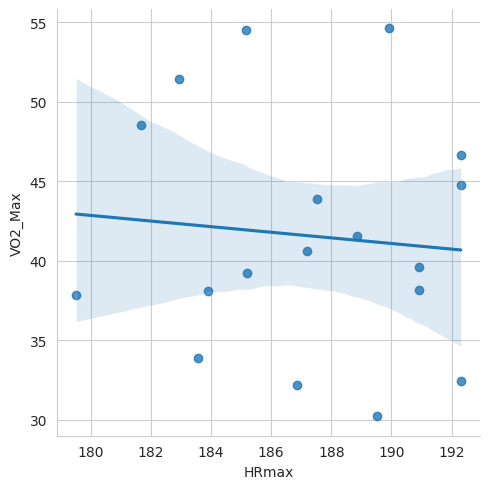

In [ ]:

sns.set_style('whitegrid')
sns.lmplot(x ='HRmax', y ='VO2_Max', data = df_info)

In [ ]:
#seperating independent and dependent variables
X = df_info.drop(['VO2_Max','ID','sport','age','P_vt1','P_vt2'], axis=1)
Y = df_info['VO2_Max']
X.shape, Y.shape

((18, 5), (18,))

In [ ]:
regressor = LinearRegression().fit(X, Y)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(X), Y))

0.9742908659725681


In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, random_state = 56)

In [ ]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.8774939811473098


In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     1.290482237585617


In [ ]:
print(lr.score(test_x,test_y))

0.9645430629921442


In [ ]:
input_data = pd.DataFrame({
    'Weight': [70.4],'Height': [182],'HRmax': [181.667],'VO2max_abs': [3.419],'powermax' :[230]

})

In [ ]:
predictions = lr.predict(input_data)

In [ ]:
print("Predictions:")
print(predictions)

Predictions:
[49.78884075]


In [ ]:
input_data1 = pd.DataFrame({
    'Weight': [76.5],
    'Height': [180],
    'HRmax': [192.3],
    'VO2max_abs': [3.42],
    'powermax' :[305]

})

In [ ]:
predictions = lr.predict(input_data1)

In [ ]:
print("Predictions:")
print(predictions)

Predictions:
[46.53529324]


In [ ]:
df_info

,ID,age,Weight,Height,P_vt1,P_vt2,sport,HRmax,VO2max_abs,powermax,VO2_Max
0,1,15,53.7,161,50,140,fencing,192.307692,1.741614,170,32.432288
1,2,15,56.2,162,80,127,fencing,183.579848,1.905661,140,33.908567
2,3,16,89.9,191,155,300,fencing,179.508212,3.402803,305,37.850975
3,4,16,76.5,180,215,275,fencing,192.307692,3.424734,305,44.767764
4,5,17,76.4,186,110,172,fencing,187.533181,3.352790,275,43.884688
5,6,17,65.6,169,131,186,fencing,182.949874,3.373193,245,51.420627
6,7,15,49.8,165,65,108,fencing,186.846996,1.600935,170,32.147290
7,8,15,51.2,165,80,133,fencing,183.910536,1.950244,170,38.090700
8,9,14,57.1,176,50,125,fencing,189.534358,1.724786,200,30.206405
9,10,14,58.8,177,101,162,fencing,190.916678,2.330225,200,39.629683


In [ ]:
#Installing model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor= RandomForestRegressor()

In [ ]:
regressor.fit(train_x,train_y)

RandomForestRegressor()

In [ ]:
#Testing the model
predictions= regressor.predict(test_x)
print("The model score is : ", regressor.score(test_x,test_y))

The model score is :  0.38165059202098206


In [ ]:
predictions = regressor.predict(input_data)

In [ ]:
print("Predictions:")
print(predictions)

Predictions:
[45.94054408]


In [ ]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 3)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     108.40794950830505


In [ ]:
predictions= reg.predict(test_x)
print("The model score is : ", reg.score(test_x,test_y))

The model score is :  -0.3865905455696148


In [ ]:
predictions = reg.predict(input_data)

In [ ]:
print("Predictions:")
print(predictions)

Predictions:
[44.94966464]


In [ ]:
input_data1 = pd.DataFrame({
    'Weight': [53.7],'Height': [161],'HRmax': [192.30],
    'VO2max_abs': [1.741],'powermax' :[170]
})

In [ ]:
predictions = reg.predict(input_data1)  #KNN
print("Predictions:")
print(predictions)

Predictions:
[34.22342632]


In [ ]:
predictions = regressor.predict(input_data1)  #random forest
print("Predictions:")
print(predictions)

Predictions:
[35.161743]


In [ ]:
predictions = lr.predict(input_data1)  #linear regression
print("Predictions:")
print(predictions)

Predictions:
[32.50611638]
